In [1]:
import pandas as pd
from utility.util import clean_columns

from matplotlib import pyplot as plt
from utility.util import plot_gender_fraction_over_time

import ipywidgets as widget

import os
import string
import zipfile
import shutil

In [2]:
qR = pd.read_csv("./utility/data/Lab 1 Quiz.csv")
# qR.head()

In [23]:
iCare = qR[['question_number','graded','answers','question_content']]
# iCare.iloc[8]['question_content']
iCare[:20]

,question_number,graded,answers,question_content
0,1.0,False,"{""0"": ""I learned how to clean up a dataset fro...","[{""type"": ""text"", ""value"": ""Turn **off** scree..."
1,2.1,True,"{""0"": [""petal length"", ""petal width"", ""sepal w...","[{""type"": ""select_all_input"", ""choices"": [{""va..."
2,2.2,True,"{""0"": ""105""}","[{""type"": ""text"", ""value"": """"}, {""type"": ""radi..."
3,3.1,False,"{""0"": ""We used petal width for the predictions...","[{""type"": ""text"", ""value"": """"}, {""type"": ""free..."
4,3.2,False,"{""0"": ""The average prediction accuracy was 88....","[{""type"": ""text"", ""value"": """"}, {""type"": ""free..."
5,3.3,False,"{""0"": ""We might cosider adding other features,...","[{""type"": ""text"", ""value"": ""Turn **off** scree..."
6,4.1,True,"{""0"": ""I agree""}","[{""type"": ""radio_input"", ""choices"": [{""value"":..."
7,4.2,False,"{""0"": ""I agree with the statement because usin...","[{""type"": ""text"", ""value"": ""Turn **off** scree..."
8,4.3,True,"{""0"": ""I strongly agree""}","[{""type"": ""radio_input"", ""choices"": [{""value"":..."
9,4.4,False,"{""0"": ""I strongly agree with this statement be...","[{""type"": ""text"", ""value"": ""Turn **off** scree..."


In [36]:
def cleaning_up (df):
    new_df = df
    for i,j in new_df.iterrows():
#       changing the question content
        answers = new_df.iloc[i]['answers'].replace("0","").translate(str.maketrans("", "", string.punctuation))
        q_content = new_df.iloc[i]['question_content'].replace("0","").translate(str.maketrans("", "", string.punctuation))
        new_df.at[i, 'answers'] = answers
        new_df.at[i, 'question_content'] = q_content
#       changing the answer content
        if "We mark D and E" in new_df.at[i, 'question_content']:
            new_df.at[i, 'question_content'] = "abc_input"
            continue;
        elif "text" in new_df.at[i, 'question_content']:
            new_df.at[i, 'question_content'] = "text"
            continue;
        elif "selectallinput" in new_df.at[i, 'question_content']:
            new_df.at[i, 'question_content'] = "select_all_input"
            continue;
        elif "radioinput" in new_df.at[i, 'question_content']:
            new_df.at[i, 'question_content'] = "radio_input"
            continue;
    return new_df

clean = cleaning_up(iCare)
q_num_cont = clean[["question_number", "question_content"]]
clean[:10]

,question_number,graded,answers,question_content
0,1.0,False,I learned how to clean up a dataset from obse...,text
1,2.1,True,petal length petal width sepal width sepal le...,select_all_input
2,2.2,True,15,text
3,3.1,False,We used petal width for the predictions thoug...,text
4,3.2,False,The average prediction accuracy was 8889 for ...,text
5,3.3,False,We might cosider adding other features such a...,text
6,4.1,True,I agree,radio_input
7,4.2,False,I agree with the statement because using DS a...,text
8,4.3,True,I strongly agree,radio_input
9,4.4,False,I strongly agree with this statement because ...,text


In [6]:
def ABC_input (df, q_num):
    answers = {
        "A" : 0,
        "B" : 0,
        "C" : 0,
        "D" : 0,
        "E" : 0
    }
    for i,j in df.iterrows():
        if df.iloc[i]['question_number'] == q_num:
            ans = str(df.iloc[i]['answers'])
            goal = ans[1]
            if goal == "A":
                answers["A"] += 1
            elif goal == "B":
                answers["B"] += 1
            elif goal == "C":
                answers["C"] += 1
            elif goal == "D":
                answers["D"] += 1
            elif goal == "E":
                answers["E"] += 1
                
    lists = sorted(answers.items())

    x, y = zip(*lists)

    plt.bar(x, y)
    plt.show()
                
# ABC_input(clean, 5.1)       



In [7]:
def radio_input (df, q_num):
    answers = {
        "I strongly disagree" : 0,
        "I disagree" : 0,
        "I neither agree nor disagree" : 0,
        "I agree" : 0,
        "I strongly agree" : 0,
        "it depends on the use case" : 0
    }
    for i,j in df.iterrows():
        if df.iloc[i]['question_number'] == q_num:
            goal = str(df.iloc[i]['answers'])
            if goal == " I strongly disagree":
                answers["I strongly disagree"] += 1
            elif goal == " I disagree":
                answers["I disagree"] += 1
            elif goal == " I neither agree nor disagree":
                answers["I neither agree nor disagree"] += 1
            elif goal == " I agree":
                answers["I agree"] += 1
            elif goal == " I strongly agree":
                answers["I strongly agree"] += 1
            elif goal == " it depends on the use case":
                answers["it depends on the use case"] += 1
    lists = sorted(answers.items())

    x, y = zip(*lists)

    plt.bar(x, y)
    plt.xticks(rotation = 45)
    plt.show()

# radio_input(clean, 4.1)

In [9]:
def short_answer (df, q_num):
    for i,j in df.iterrows():
        if df.iloc[i]['question_number'] == q_num:
            ans = str(df.iloc[i]['answers'])
            print(ans)
            print()
# short_answer(clean, 1.0)

In [43]:
def get_question_nums(df):
    count = 0
    first_num = df.iloc[0,6]
    for index,row in df.iterrows():
        print(df.iloc[index,6])
        count += 1
        index = index+1
        if(df.iloc[index,6] == first_num):
            break                 
# get_question_nums(qR)

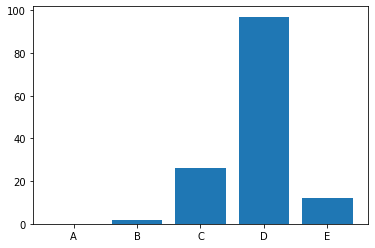

In [54]:
def get_anything (df, q_num):
    for i,j in df.iterrows():
        if df.iloc[i]["question_number"] == q_num:
            if df.iloc[i]["question_content"] == "text":
                short_answer(df, q_num)
                break
            elif df.iloc[i]["question_content"] == "abc_input":
                ABC_input(df, q_num)
                break
            elif df.iloc[i]["question_content"] == "select_all_input":
                print("idk how to do this yet")
                break
            elif df.iloc[i]["question_content"] == "radio_input":
                radio_input (df, q_num)
                break
# ABC ex 5.1
# text ex 1.0
# select ex 2.1
# radio ex 4.1
# clean is the cleaned dataframe
get_anything(clean, 5.1)